<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Solution

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

**Solution**:

$\begin{align*}
P(R_5) &= P(R_5 \mid F)P(F) + P(R_5 \mid S) P(S) + P(R_5 \mid T) P(T) \\
&= 0 + \frac{1}{6} \frac{10}{40} + \frac{1}{20}\frac{2}{40} \\
&= \frac{10}{240} + \frac{2}{800} \\
&= \frac{53}{1200} \approx 0.044167 
\end{align*}$

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

**Solution**:

We use Bayes' Theorem:

$\begin{align*}
P(S \mid R_5) &= \frac{P(R_5 \mid S) P(S)}{P(R_5)} \\
 &= \frac{\frac{1}{6} \cdot \frac{10}{40}}{\frac{53}{1200}} \\
 &= \frac{\frac{1}{24}}{\frac{53}{24\cdot 50}} \\
 &= \frac{50}{53} \approx 0.943
\end{align*}$

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

**Solution:**

No they are not independent.  We know this because $P(R_5) \neq P(R_5 \mid S)$:
* $P(R_5) \approx 0.044167$ (from **Part A**)
* $P(R_5 \mid S) = \frac{1}{6} \approx 0.167$ (from part of **Part B**)

**NB:** We could also have checked either:
* $P(R_5 \cap S) \stackrel{?}{=} P(R_5)P(S)$, or
* $P(S \mid R_5) \stackrel{?}{=} P(S)$

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

**Solution:**

$\begin{align*}
P(F \mid E_1) &= \frac{P(E_1 \mid F) P(F)}{P(E_1)} \\
 &= \frac{P(E_1 \mid F) P(F)}{P(E_1 \mid F) P(F) + P(E_1 \mid S) P(S)  + P(E_1 \mid T) P(T)} \\
 &= \frac{1 \cdot \frac{28}{40}}{1\cdot \frac{28}{40} + \frac{4}{6} \frac{10}{40}  + \frac{4}{20} \frac{2}{40}} \\
 &= \frac{\frac{7}{10}}{\frac{7}{10} + \frac{40}{240} + \frac{8}{800}} \\
 &\approx 0.7985
\end{align*}$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

**Solution**:

Let $E_n$ be the event that we roll $n$ values in a row that are 1,2, 3 or 4.

$$P(F \mid E_n) = \frac{P(E_n \mid F) P(F)}{P(E_n)}$$

Use the Law of Total Probability on the denominator to get

$$P(F \mid E_n) = \frac{P(E_n \mid F) P(F)}{P(E_n \mid F) P(F) + P(E_n \mid S) P(S)  + P(E_n \mid T) P(T)}$$

Substitute in the easy things we already know:

$$P(F \mid E_n) = \frac{P(E_n \mid F) \frac{28}{40}}{P(E_n \mid F) \frac{28}{40} + P(E_n \mid S) \frac{10}{40} + P(E_n \mid T) \frac{2}{40}}$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Four-sided die in hand?
$$P(E_n \mid F) = 1$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Six-sided die in hand?
$$P(E_n \mid S) = \left(\frac{4}{6}\right)^n = \left(\frac{2}{3}\right)^n$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Twenty-sided die in hand?
$$P(E_n \mid T) = \left(\frac{4}{20}\right)^n = \left(\frac{1}{5}\right)^n$$

Plug in side calcs:
$$P(F \mid E_n) = \frac{1 \cdot \frac{7}{10}}{1 \cdot \frac{7}{10} + \left(\frac{2}{3}\right)^n \cdot \frac{1}{4} + \left(\frac{1}{5}\right)^n \frac{1}{20}}$$

In [5]:
def prob_four(n):
    return 0.7/(0.7 + 0.25*((2/3)**n) + 0.05*(.2**n))

# Verification of Part D answer:  plug in n=1
print(prob_four(1))

0.7984790874524715


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [7]:
[prob_four(n) for n in range(1,6)]

[0.7984790874524715,
 0.860890953812517,
 0.9038391644509058,
 0.9340024326892286,
 0.9550605655503714]

**Solution:** $n=5$ is large enough for us to say there's at least a 95% chance we are rolling a 4-sided die.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

**Solution**:

Let $L_2$ be the event that Oscar goes to the Library $L$ as his second location. Similarly, let $G_1$, $C_1$, $R_1$, $L_1$, $H_1$ and $E_1$ be the events that Oscar goes to the Gym, Coffee, Reservoir, Library, Hill and Engineering Center as his first location, respectively.  Yes, Oscar cannot actually go to some of these places in 1 step, and cannot get to the Library from some of them in 1 step either, so a bunch of probabilities we write down are going to end up being 0.

Using the LTP, we have:

$\begin{align*}
P(L_2) &= P(L_2 \mid G_1)P(G_1) &&+ P(L_2\mid C_1)P(C_1) &&+ P(L_2\mid R_1)P(R_1) &&+ P(L_2\mid L_1)P(L_1) &&+ P(L_2\mid H_1)P(H_1) &&+ P(L_2\mid E_1)P(E_1) \\
&= \frac{1}{4}\cdot\frac{1}{4} &&+ \frac{1}{3}\cdot\frac{1}{4} &&+ 0 \cdot \frac{1}{4} &&+ 0 \cdot \frac{1}{4} &&+ \frac{1}{3} \cdot 0 &&+ \frac{1}{4} \cdot 0 \\
&= \frac{1}{16} + \frac{1}{12} = \frac{12+16}{12\cdot 16} = \frac{28}{192} = \frac{14}{96} \\
&= \fbox{$\frac{7}{48} \approx 0.1458$}
 \end{align*}$

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

**Solution**:

Let's use the same system to label the first and second stops of Stella, as in Part A.

So $G_1$ is the event that Stella goes to the Gym as her first stop after leaving the Reservoir, and $G_2$ is the event that Stella goes to the Gym as her second stop after the Reservoir.

We are looking for $P(G_1 \cup G_2)$, which from our probability rules we know is:
$$P(G_1 \cup G_2) = P(G_1) + P(G_2) - P(G_1 \cap G_2)$$

But, since Stella always must be on the move, the Gym cannot be both the first ***and*** the second stop.  So $P(G_1 \cap G_2) = 0$.

Writing down $P(G_1)$ is straightforward. There are two places to go from $R$, and one is $G$:
$$P(G_1) = \frac{1}{2}$$

And we can write down $P(G_2)$ using the LTP, like in Part A.  So, if Stella starts from the Reservoir, we have:

$\begin{align*}
P(G_2) &= P(G_2 \mid G_1)P(G_1) &&+ P(G_2\mid C_1)P(C_1) &&+ P(G_2\mid R_1)P(R_1) &&+ P(G_2\mid L_1)P(L_1) &&+ P(G_2\mid H_1)P(H_1) &&+ P(G_2\mid E_1)P(E_1) \\
&= 0 \cdot\frac{1}{2} &&+ 0 \cdot 0 &&+ \frac{1}{2} \cdot 0 &&+ \frac{1}{4} \cdot 0 &&+ \frac{1}{3} \cdot 0 &&+ \frac{1}{4} \cdot \frac{1}{2} \\
&= \frac{1}{8}
 \end{align*}$
 
So, we have an answer of $P(G_1 \cup G_2) = \dfrac{1}{2} + \dfrac{1}{8} = \fbox{$\dfrac{5}{8}~~\text{or}~~0.625$}$

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**Solution:**

**[1]**

They could run into each other at the first location visited in exactly one of 3 distinct ways:  at the Gym, Library or Coffee. Let's use the same variable naming convention as in Parts A and B, but use capital letters for Stella's stops and lowercase letters for Oscar's stops.

So we want:
$$P(\text{meet at first stop}) = P(G_1 \cap g_1) + P(L_1 \cap l_1) + P(C_1 \cap c_1)$$

and since the two move independently of one another, this is
$$\begin{align*}
P(\text{meet at first stop}) &= P(G_1) P(g_1) + P(L_1)P(l_1) + P(C_1) P(c_1) \\
 &= \frac{1}{3} \cdot \frac{1}{4} + \frac{1}{3} \cdot \frac{1}{4} + \frac{1}{3} \cdot \frac{1}{4} \\
 &= 3\cdot \frac{1}{12} \\
 &= \frac{1}{4}
 \end{align*}$$
 
**[2]**

For the two of them to both end up at the Hill after 2 moves, from independence, we have:
$$P(H_2 \cap h_2) = P(H_2)P(h_2)$$

So let's calculate $P(H_2)$ and $P(h_2)$, then multiply them together.

From the LTP, and leaving off terms we know will have 0 probability associated with them, for Stella we have:

$\begin{align*}
P(H_2) &= P(H_2 \mid G_1)P(G_1) + P(H_2 \mid L_1)P(L_1) + P(H_2 \mid C_1)P(C_1) \\
       &= \frac{1}{4} \cdot \frac{1}{3} + \frac{1}{4} \cdot \frac{1}{3} + \frac{1}{3} \cdot \frac{1}{3} \\
       &= \frac{1}{12} + \frac{1}{12} + \frac{1}{9} \\
       &= \frac{5}{18}
\end{align*}$

And we do a similar song and dance for Oscar:

$\begin{align*}
P(h_2) &= P(h_2 \mid g_1) P(g_1) + P(h_2 \mid l_1) P(l_1) + P(h_2 \mid c_1) P(c_1) \\
       &= \frac{1}{4} \cdot \frac{1}{4} + \frac{1}{4} \cdot \frac{1}{4} + \frac{1}{3} \cdot \frac{1}{4} \\
       &= \frac{1}{16} + \frac{1}{16} + \frac{1}{12} \\
       &= \frac{5}{24}
\end{align*}$

So, multiply these together to find:

$P(H_2 \cap h_2) = P(H_2) P(h_2) = \dfrac{5}{18} \cdot \dfrac{5}{24} = \fbox{$\dfrac{25}{432} \approx 0.05787$}$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

**Solution:**

The `sim_scooch` function takes the initial location of Oscar or Stella, the number of steps the octopus will take, and the adjacency graph for the states accessible from each state location, and will return a random location for the person to be in after `n_steps` steps.

Then, we can simulate a whole bunch of 2-step scooches for Oscar, starting from the Engineering Center, and see what proportion of the time he ends up at the Library (for Part A for example).

In [2]:
# Let's make a dictionary of the neighbors of each location 
graph = {"H":["G","L","C"],      # neighbors of H
         "G":["H","L","E","R"],  # neighbors of G
         "R":["G","E"],          # neighbors of R
         "L":["H","G","E","C"],  # neighbors of L
         "E":["C","L","G","R"],  # neighbors of E
         "C":["H","L","E"]}      # neighbors of C

def sim_scooch(initial_location, n_steps, neighbors):
    location = initial_location
    for step in range(n_steps):
        # Choose a random location by using the neighbors graph!
        location = np.random.choice(neighbors[location])
    return location

So to verify our solution to **Part A**, we need to start Oscar off at the Engineering Center (E) and see how frequently the Library (L) results after 2 steps.

In [3]:
n_sim = 100000
pr2 = np.array([sim_scooch("E",2,graph)=="L" for kk in range(n_sim)]).sum()/n_sim
print(pr2)

0.14497


That's pretty close to our analytical result of about 0.1458. Woohoo!

And to verify our solution to **Part B**, we need to start Stella off at the Reservoir (R) and see how frequently she ends up getting jacked at the Gym (G) after 1 step, and add this to how often she ends up at the Gym after 2 steps.

In [4]:
n_sim = 100000
one_step = np.array([sim_scooch("R",1,graph)=="G" for kk in range(n_sim)]).sum()/n_sim 
two_step = np.array([sim_scooch("R",2,graph)=="G" for kk in range(n_sim)]).sum()/n_sim
print(one_step + two_step)

0.62925


That's pretty close to our analytical result of 0.625.  Horray!

For the 1-step meeting probability for **Part C**, let's start Oscar off at the Engineering Center and start Stella off at the Hill, move them each 1 step, and see how frequently they end up in the same place.

In [5]:
n_sim = 1000000
oscar  = np.array([sim_scooch("E",1,graph) for kk in range(n_sim)])
stella = np.array([sim_scooch("H",1,graph) for kk in range(n_sim)])
print(np.sum(oscar==stella)/n_sim)

0.249957


That's pretty close to our analytical result of 0.25.  Yippee-dippee!

Finally, for the 2-step meeting probability at the Hill of **Part C**, we do a similar thing but with 2 steps.

In [6]:
n_sim = 1000000
oscar    = np.array([sim_scooch("E",2,graph) for kk in range(n_sim)])
p_oscar  = np.sum(oscar=="H")/n_sim
stella   = np.array([sim_scooch("H",2,graph) for kk in range(n_sim)])
p_stella = np.sum(stella=="H")/n_sim
print(p_oscar*p_stella)

0.057750728088


That's pretty darn close the our analytical result of about 0.05787. Yehoot!

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

***
**Solution**: 

$$
\Omega = \{HM, MH, HHHM, HHMH, MMHM, MMMH, \ldots \}
$$
***

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

***
**Solution**: We have 

$$
P(T \mid E) = \frac{P(T \cap E)}{P(E)} = \frac{P(\{HM\})}{P(\{HM, MH\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

***

**Part C**: Explain why events $C$ and $T$ are independent. 

***
**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that Tony wins and the probability that the duel is continues after the first round *must* be independent. Each round of the duel begins with the two Jedi tied, and takes place identically, regardless of what score Tony and Dan are tied at. (5 to 5 is the same as 10 to 10). So Tony's probability of winning beginning on round 1 versus his probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(T|C) = P(T)$$
which means they are independent.
***

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

***
**Solution**: We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

\begin{eqnarray}
\nonumber P(T) &=& P(T \mid E)P(E) + P(T \mid C)P(C)  \\
\\
\nonumber  &=& P(T \mid E)P(\{HM, MH\}) + P(T \mid C)P(\{HH, MM\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} P(\{HM, MH\}) + P(T \mid C)P(\{HH, MM\})  \quad \left[\textrm{From }\textbf{Part A}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(HM)+ P(MH))\right] + P(T \mid C)\left[P(HH) + P(MM)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(T \mid C)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(T \mid C)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(T \mid C)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}

***

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

***
**Solution**: We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

Part D tells us:
$$P(T) = p(1-q) + P(T \mid C)\left(2pq - p - q +1 \right)$$

And Part B tells us:
$$P(T \mid C) = P(T)$$

Put them together.
$$P(T) = p(1-q) + P(T)\left(2pq - p - q +1 \right)$$

Solve algebraically for $P(T)$.
$$P(T) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(T) = \frac{p(1-q)}{-2pq + p + q }$$
***

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

***
**Solution**:
If there is no winner, it is as if the whole dueling process restarts anew. The duel has  no memory of previous rounds. Thus, the probability that Tony wins must be the same as the probability that Tony wins in just one round, including in the first one.

Therefore, $P(T) = P(T \mid C)$.
***

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

***
**Solution**:
We can only use this sort of technique if $T$ is indeed independent of $C$. In a different problem, where these two events were not independent, this solution approach would not work.
***

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [2]:
def miniopoly_turn(state, cash):
    # bankrupt!
    if cash==0:
        return state, cash
    # roll two dice
    a = np.random.choice(6)+1
    b = np.random.choice(6)+1
    
    # if in jail
    if state==30:
        # did we roll doubles?
        if a==b:
            # move from state 10
            state = 10+a+b
        else:
            cash += -20
            return state, cash
    # and if not in jail
    else:
        state = state + a + b    

    # pass or land on GO
    if state >= 40:
        cash += 200
        state = state-40
    # draw cards
    if state in [2,7,17,22,33,36]:
        cash += np.random.choice([50,100,200,-50,-100])
        return state, cash 
    # Jail
    if state==30:
        return state, cash 
    if state in list([0,10,20]):
        return state, cash
    else:
        # otherwise, pay up.
        cash += -state
        return state, cash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

In [3]:
def game():
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if c <= 0:
            return 0
    return c

ngames = 10000
final_cash = np.zeros(ngames)
for g in range(ngames):
    final_cash[g] = game()

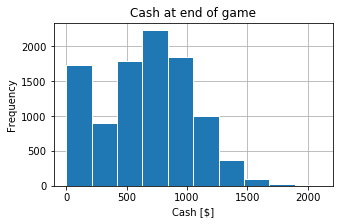

In [4]:
x = pd.Series(final_cash)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))

x.hist(edgecolor='white', ax=ax)
ax.set_title('Cash at end of game')
ax.set_xlabel('Cash [$]')
ax.set_ylabel('Frequency')
ax.set_axisbelow(True)


**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [5]:
ngames = 10000
bankrupt = 0
for g in range(ngames):
    if game()==0:
        bankrupt += 1
bankrupt/ngames

0.1353

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

**Solution:**

The following `jail_game` code will start a new game by calling itself if the game ended and the player did not go to jail. Thus, if you run it $n$ times, then you will have $n$ games in which the player has gone to jail. This means we just need to look at in how many `jail_games` the player goes bankrupt, out of the total number of `jail_games`.

In [11]:
def jail_game():
    visitedJail = False
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if s==30:
            visitedJail = True
        if c <= 0:
            if visitedJail:
                return 0
            else:
                return jail_game()
    if visitedJail:
        return c
    else:
        return jail_game()

In [12]:
ngames = 10000
bankrupt = 0
for g in range(ngames):
    if jail_game()==0:
        bankrupt += 1
bankrupt/ngames

0.1987

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [13]:
def is_jail_game():
    visitedJail = False
    s,c = 0,200
    for turn in range(30):
        s,c = miniopoly_turn(s,c)
        if s==30:
            return 1
        if c <= 0:
            return 0
    return 0

In [14]:
ngames = 10000
jail = 0
for g in range(ngames):
    if is_jail_game()==1:
        jail += 1
jail/ngames

0.5177

By Bayes, 
$$P(J\mid B) = \frac{P(B \mid J)P(J)}{P(B)}$$

And our ingredients are:
$$P(B) = 0.1414$$
$$P(B\mid J) = 0.1956$$
$$P(J)=0.5157$$

Note that your values for those three may differ, but should be consistent with your answers to Parts C, D and E.

Plugging in:
$$P(J \mid B)=\frac{0.1956 \times 0.5157}{0.1414}$$

$$P(J \mid B)=0.7134$$

***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


**Solution:**

$\begin{align}
P(C) &= P(\text{same}) + P(\text{differ by one})
\end{align}$

We can start with the more straightforward part, $P(\text{same})$.
* There are a total of 36 possible outcomes (not necessarily distinct sums of the dice), and each is equally likely with probability 1/36.
* Six of these 36 outcomes correspond to rolling the same number of both dice (1-1, 2-2, and so on).
* Thus, the probability of rolling the same on both dice is $P(\text{same}) = 6\cdot 1/36 = 6/36$

Now it is time for the slightly tougher part, calculating $P(\text{differ by one})$
* There are five ways for the two dice to come up differing by one: 1-2, 2-3, 3-4, 4-5 and 5-6
* Each of these five ways has two possible "orientations": 1-2 and 2-1, for example
* This gives 10 distinct outcomes of the total 36, where the dice differ by one
* Thus, the probability of rolling two numbers that differ by one is $P(\text{differ by one}) = 10\cdot 1/36 = 10/36$

So we have $\fbox{$P(C) = 6/36 + 10/36 = 16/36 \approx 0.444$}$

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [15]:
# Solution:

def dice_sim(num_trials=1000):
    
    roll1 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    roll2 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    
    running_prob = np.array([np.sum(np.abs(roll1[1:ii+1]-roll2[1:ii+1])<=1)/(ii+1) for ii in range(num_trials-1)])
    
    return running_prob

p = dice_sim(num_trials=100000)
print("P(C) \u2248 {}".format(p[-1]))

P(C) ≈ 0.44103441034410346


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

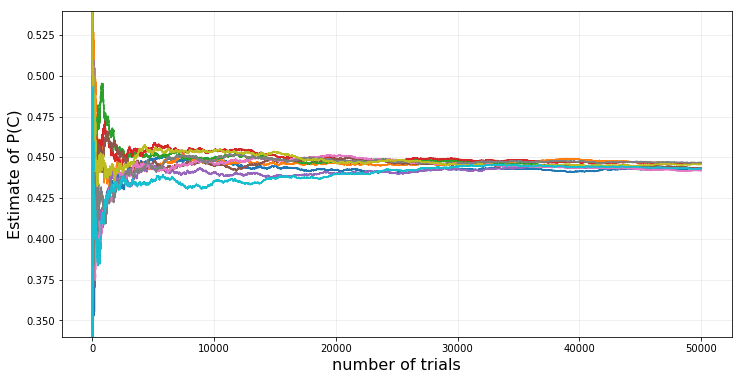

In [17]:
# Solution:

def dice_sim(num_trials=1000):
    
    roll1 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    roll2 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    
    running_prob = np.array([np.sum(np.abs(roll1[1:ii+1]-roll2[1:ii+1])<=1)/(ii+1) for ii in range(num_trials-1)])
    
    return running_prob
    
def plot_estimates(num_sims=10):
    
    fig, ax = plt.subplots(figsize=(12,6))
    for ii in range(num_sims):
        p = dice_sim(50000)
        ax.plot(p)
        
    ax.grid(True, alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("number of trials", fontsize=16)
    ax.set_ylabel("Estimate of P(C)", fontsize=16)
    ax.set_ylim([.34,.54])
        
plot_estimates()

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

**Solution:**

The different estimates take about 10,000 iterations to start to converge on 44%. But as the number of trials increases, the ten estimates start to blend together, although we can see that even by 50,000 trials, the ten estimates are not yet indistinguishable from one another.

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)